In [22]:
from fastai.data.all import *
from fastai.vision.all import *

In [35]:
def label_func(fname):
    if 'bird' in str(fname):
        return 'bird'
    else:
        return 'no'

In [36]:
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = get_image_files,
                   splitter   = RandomSplitter(),
                   get_y      = label_func,
                   item_tfms  = (Resize(112)),
                   batch_tfms = aug_transforms(do_flip=False, flip_vert=False, max_rotate=3.0, min_zoom=0.9, max_zoom=1.1))

In [48]:
dls = dblock.dataloaders("images", bs=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


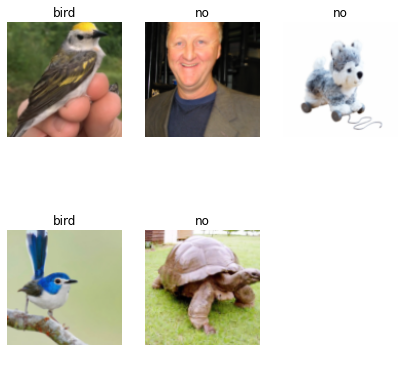

In [49]:
dls.show_batch(max_n=16, figsize=(7,7))

In [43]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Stin/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [53]:
learn.predict()

TypeError: predict() missing 1 required positional argument: 'item'

In [57]:
model = models.resnet50(True)

In [54]:
import cv2

In [55]:
img = cv2.imread('images/bird_0001.png')

In [63]:
x = image2tensor(img)

In [65]:
model(x)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 7, 7], but got 3-dimensional input of size [3, 342, 512] instead